## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

In [23]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#Read the the study results
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID", how="outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mouse_count= combined_data["Mouse ID"].count()
mouse_count

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= combined_data["Mouse ID"].duplicated()
duplicate_mice.head()


0    False
1     True
2     True
3     True
4     True
Name: Mouse ID, dtype: bool

In [24]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_count= clean_data["Mouse ID"].count()
mouse_count


249

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary1_df= combined_data.groupby("Drug Regimen")
tumor_mean = summary1_df["Tumor Volume (mm3)"].mean()
tumor_median = summary1_df["Tumor Volume (mm3)"].median()
tumor_stdev = summary1_df["Tumor Volume (mm3)"].std()
tumor_SEM = summary1_df["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({'Mean':tumor_mean, 'Median':tumor_median, 'Standard Deviation':tumor_stdev, 'SEM':tumor_SEM})
summary_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of mice for Each Treatment'}, xlabel='Drug Regimen', ylabel='Number of mice per treatment'>

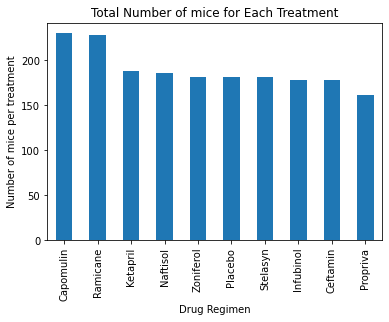

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plot = combined_data["Drug Regimen"].value_counts().plot.bar(width= 0.5,zorder=0)
#set labels for bar plot
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of mice per treatment")
bar_plot.set_title("Total Number of mice for Each Treatment")
bar_plot


In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_data_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

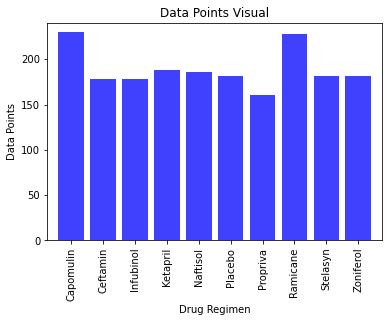

In [28]:
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


Text(0, 0.5, '')

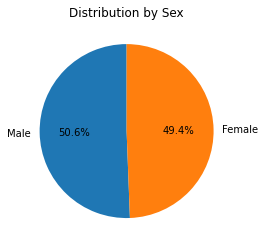

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdata= combined_data["Sex"].value_counts()
pie_plot= genderdata.plot.pie(autopct="%1.1f%%",startangle=90,title="Distribution by Sex")
pie_plot.set_ylabel('')


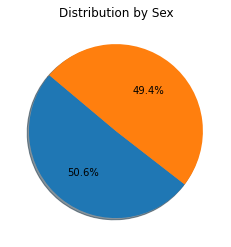

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

combined_df= combined_data['Sex'].value_counts()
plt.pie(combined_df, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values= []
for drug in drugs:
        t_volume= combined_data.loc[combined_data['Drug Regimen']==drug]
best_regimen = combined_data[combined_data["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
best_regimen = best_regimen.sort_values(["Timepoint"], ascending=True)
best_regimen

best_regimen_data = best_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimen_data
        

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
sorted_data = best_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
sorted_data.head()
best_regimen_df = sorted_data.to_frame()
best_regimen_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

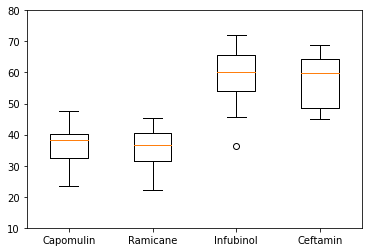

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_df = best_regimen_df.reset_index()
tumor_list = treatment_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(drugs)
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=drugs)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = combined_data[combined_data["Mouse ID"].isin(["j119"])]
time_tumor
time_vs_tumor= time_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3)
328,j119,0,45.000000
329,j119,5,45.838998
330,j119,10,46.425366
331,j119,15,47.322984
332,j119,20,48.158209
333,j119,25,42.417166
334,j119,30,43.013681
335,j119,35,43.765705
336,j119,40,44.585090
337,j119,45,38.125164


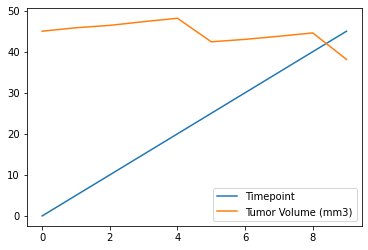

In [40]:
#line plot
line_plot = time_vs_tumor.reset_index()
line_plot_df = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_df

lines = line_plot_df.plot.line()
tumorvolume_list = line_plot_df['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_df['Timepoint'].tolist()

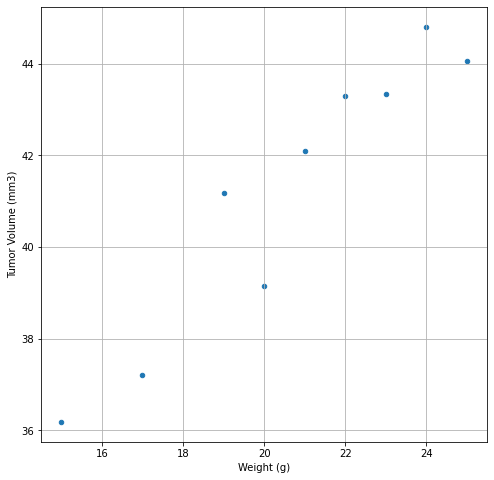

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter = best_regimen[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin= capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

The correlation coefficient between mouse weight and the capomulin regimen is 0.95


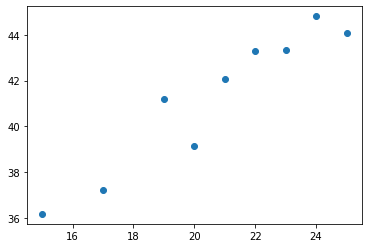

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
print(f"The correlation coefficient between mouse weight and the capomulin regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")

1. With a correlation of 0.95, there is a positive correlation between the use of Capomulin and weight among the studied mice.
3. Capomulin is successful in reducing the size of the tumors affecting the mice.